# 02 Neural Network Classification using Pytorch

In [259]:
import torch
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from torch import nn  #neural networks
import requests
print(torch.__version__)

2.7.1+cu118


## 1. Data

In [260]:
n_samples=1000
X,Y=make_circles(n_samples,noise=0.03,random_state=42)
len(X),len(Y)

(1000, 1000)

In [261]:
print(f"X shape: {X.shape}, y shape: {Y.shape}\n ")
# Convert to tensors
print(f"first 5 samples of X:\n {X[:5]},\n \n first 5 samples of y:\n {Y[:5]}")

X shape: (1000, 2), y shape: (1000,)
 
first 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]],
 
 first 5 samples of y:
 [1 1 1 1 0]


In [262]:
#making Dataframe of circle data
circles=pd.DataFrame({'X1':X[:,0],'X2':X[:,1],'label':Y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


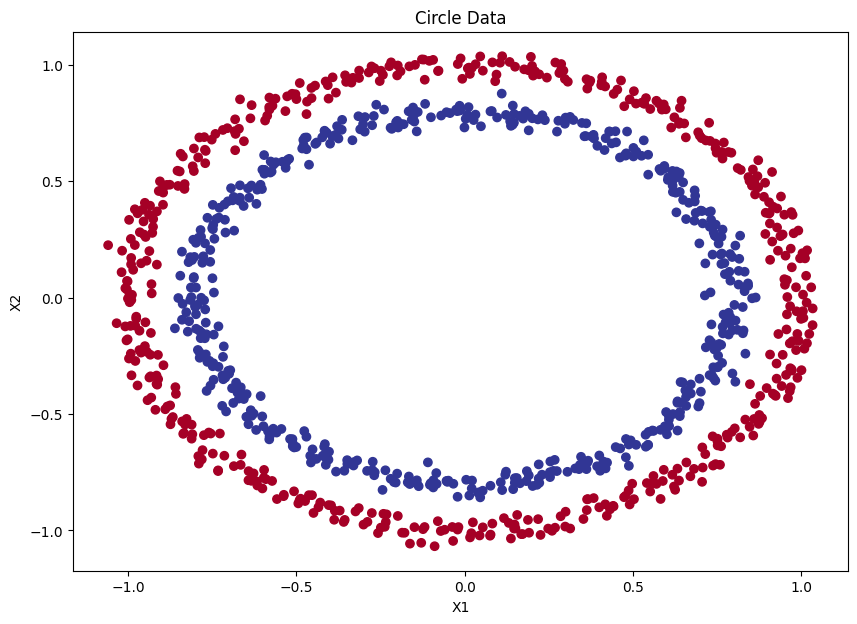

In [263]:
#visualizing the data
plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.RdYlBu)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Circle Data')
plt.show()

### 1.1 Check inputs and output shapes

In [264]:
X.shape, Y.shape

((1000, 2), (1000,))

In [265]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]], shape=(1000, 2))

In [266]:
#view the first example of X and Y
print(f"First example of X: {X[0]}\nFirst example of Y: {Y[0]}")
print(f'shape of X: {X[0].shape}, shape of Y: {Y[0].shape}')

First example of X: [0.75424625 0.23148074]
First example of Y: 1
shape of X: (2,), shape of Y: ()


### 1.2 Turn the data into tensors

In [267]:
# turn the data into tensors
X=torch.from_numpy(X).type(torch.float)
Y=torch.from_numpy(Y).type(torch.float)
X[:5],Y[:5],X.dtype,Y.dtype

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]),
 torch.float32,
 torch.float32)

In [268]:
#split the data into train and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(Y_train),len(Y_test)

(800, 200, 800, 200)

## 2. Building a Model

In [269]:
device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [270]:
# class CircleModelV0(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.layer_1=nn.Linear(in_features=2,out_features=5)#takes 2 features and upscales to 10 features
#         self.layer_2=nn.Linear(in_features=5,out_features=7)#takes 10 features from previous layer and upscales to 25 features
#         self.layer_3=nn.Linear(in_features=7,out_features=1)#takes 25 features from previous layer and downscales to 1 feature (binary classification)

    
#     def forward(self,x):
#         return self.layer_3(self.layer_2(self.layer_1(x)))
    
# model_0=CircleModelV0().to(device=device)
# model_0

model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),  # input layer
    nn.Linear(in_features=5,out_features=7),  # hidden layer
    nn.Linear(in_features=7,out_features=1)   # output layer
).to(device=device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=7, bias=True)
  (2): Linear(in_features=7, out_features=1, bias=True)
)

In [271]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('0.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140],
                      [-0.2060, -0.0524, -0.1816,  0.2967, -0.3530],
                      [-0.2062, -0.1263, -0.2689,  0.0422, -0.4417],
                      [ 0.4039, -0.3799,  0.3453,  0.0744, -0.1452],
                      [ 0.2764,  0.0697,  0.3613,  0.0489, -0.1410],
                      [ 0.1202, -0.1213,  0.1882,  0.3993,  0.2585],
                      [-0.1955,  0.2582,  0.0800,  0.2271, -0.2726]], device='cuda:0')),
             ('1.bias',
              tensor([-0.4427, -0.1728, -0.3430,  0.3670,  0.1288,  0.1852,  0.1414],

In [272]:
with torch.inference_mode():
    untrained_preds=model_0(X_test.to(device))
    print(f"Untrained model first 10 predictions:\n{untrained_preds[:10]},\n\nShape: {untrained_preds[:10].shape}, \n\nlength: {len(untrained_preds)},")

Untrained model first 10 predictions:
tensor([[0.0562],
        [0.0499],
        [0.1267],
        [0.0360],
        [0.2124],
        [0.2079],
        [0.1222],
        [0.1594],
        [0.1230],
        [0.0504]], device='cuda:0'),

Shape: torch.Size([10, 1]), 

length: 200,


### 2.1 Setup Loss function and Optimizer

In [273]:
loss_fn=nn.BCEWithLogitsLoss() #binary cross entropy with logits loss it has sigmoid activation function built in
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1) #stochastic gradient descent optimizer

In [274]:
# Calculate the Accuracy- out of 100 examples, how many are correct?
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc

## 3. Train Model

### 3.1 Going from raw logits(Model Output, Inputs to Activation function)->prediction probability(Output of Activation function)->prediction labels(Target Labels)

In [275]:
model_0.eval()
with torch.inference_mode():
    y_logits=model_0(X_test.to(device))
    print(f"First 10 logits:\n{y_logits[:10]} \n")
    Y_preds_probs=torch.sigmoid(y_logits)
    print(f"First 10 prediction probabilities:\n{Y_preds_probs[:10]} \n")
    Y_preds=torch.round(Y_preds_probs)
    print(f"First 10 predictions:\n{Y_preds[:10]} \n")

    print(torch.eq(Y_preds.squeeze(),Y_test.to(device)).sum().item())

First 10 logits:
tensor([[0.0562],
        [0.0499],
        [0.1267],
        [0.0360],
        [0.2124],
        [0.2079],
        [0.1222],
        [0.1594],
        [0.1230],
        [0.0504]], device='cuda:0') 

First 10 prediction probabilities:
tensor([[0.5140],
        [0.5125],
        [0.5316],
        [0.5090],
        [0.5529],
        [0.5518],
        [0.5305],
        [0.5398],
        [0.5307],
        [0.5126]], device='cuda:0') 

First 10 predictions:
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0') 

100


### 3.2 Training and Testing loop

In [276]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=1000
X_train,Y_train=X_train.to(device),Y_train.to(device)
X_test,Y_test=X_test.to(device),Y_test.to(device)
for epoch in range(epochs):
    #training the model
    #set the model to training mode
    model_0.train()
    #forward pass
    Y_logits=model_0(X_train).squeeze()
    Y_preds=torch.round(torch.sigmoid(Y_logits))
    #calculating the loss and accuracy
    loss=loss_fn(Y_logits,Y_train)
    acc=accuracy_fn(y_true=Y_train,y_pred=Y_preds)
    #optimizer zero grad
    optimizer.zero_grad()
    #loass Backward pass
    loss.backward()
    #optimizer step
    optimizer.step()
    #testing the model
    #set the model to evaluation mode
    model_0.eval()
    with torch.inference_mode():
        #forward pass
        test_logits=model_0(X_test.to(device)).squeeze()
        test_preds=torch.round(torch.sigmoid(test_logits))
        #calculating the loss and accuracy
        test_loss=loss_fn(test_logits,Y_test)
        test_acc=accuracy_fn(y_true=Y_test,y_pred=test_preds)
        if epoch % 10 == 9 or epoch == 0:
            #print the loss and accuracy
            print(f"Epoch: {epoch+1} | Train Loss: {loss:.5f} | Train Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 1 | Train Loss: 0.69617 | Train Acc: 50.00% | Test Loss: 0.69387 | Test Acc: 50.00%
Epoch: 10 | Train Loss: 0.69442 | Train Acc: 53.62% | Test Loss: 0.69235 | Test Acc: 57.50%
Epoch: 20 | Train Loss: 0.69397 | Train Acc: 51.00% | Test Loss: 0.69203 | Test Acc: 53.00%
Epoch: 30 | Train Loss: 0.69382 | Train Acc: 50.00% | Test Loss: 0.69200 | Test Acc: 53.50%
Epoch: 40 | Train Loss: 0.69373 | Train Acc: 50.00% | Test Loss: 0.69204 | Test Acc: 54.00%
Epoch: 50 | Train Loss: 0.69366 | Train Acc: 50.00% | Test Loss: 0.69209 | Test Acc: 53.50%
Epoch: 60 | Train Loss: 0.69360 | Train Acc: 49.75% | Test Loss: 0.69215 | Test Acc: 53.00%
Epoch: 70 | Train Loss: 0.69355 | Train Acc: 49.75% | Test Loss: 0.69222 | Test Acc: 53.50%
Epoch: 80 | Train Loss: 0.69351 | Train Acc: 49.25% | Test Loss: 0.69228 | Test Acc: 53.50%
Epoch: 90 | Train Loss: 0.69346 | Train Acc: 49.62% | Test Loss: 0.69234 | Test Acc: 54.00%
Epoch: 100 | Train Loss: 0.69343 | Train Acc: 49.50% | Test Loss: 0.69240 | Test 

## 4. Make Predictions and Evaluate the Model

In [277]:
#make predictions and evaluating the model
#Download helper function ffrom Learn pytorch repo (if its not already)
if Path('helper_functions.py').is_file():
    print("helper_functions.py already exists, skipping download.")
else:
    print("Downloading helper_functions.py...")
    url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
    response = requests.get(url)
    with open('helper_functions.py', 'wb') as f:
        f.write(response.content)
    print("Download complete.")

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download.


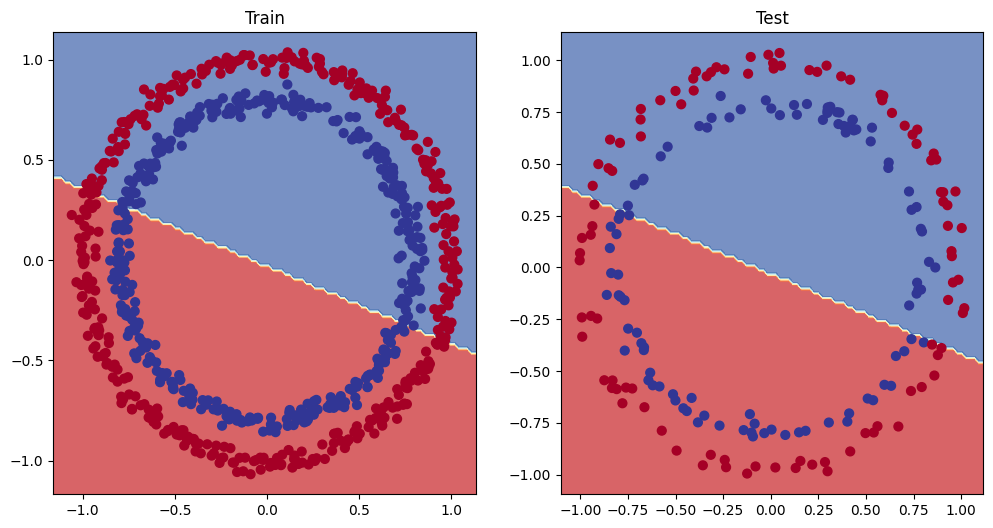

In [278]:
# plotting the predictions
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,Y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,Y_test)

## 5. Improving a Model (from model perspective)

In [279]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5392,  0.5787],
                      [-0.1655,  0.6451],
                      [-0.1656,  0.1189],
                      [-0.3245,  0.4532],
                      [ 0.6325, -0.4972]])),
             ('0.bias', tensor([0.6172, 0.1346, 0.5291, 0.0855, 0.3337])),
             ('1.weight',
              tensor([[-0.0548,  0.3500,  0.0651, -0.2067,  0.1123],
                      [-0.1232,  0.0115, -0.1935,  0.3260, -0.3878],
                      [-0.2656, -0.1728, -0.2598,  0.0208, -0.4158],
                      [ 0.4070, -0.3777,  0.3447,  0.0753, -0.1462],
                      [ 0.2218,  0.0254,  0.3696,  0.0279, -0.1147],
                      [ 0.1456, -0.1014,  0.1843,  0.4084,  0.2474],
                      [-0.2197,  0.2384,  0.0839,  0.2178, -0.2607]])),
             ('1.bias',
              tensor([-0.4450, -0.2067, -0.3173,  0.3656,  0.1534,  0.1742,  0.1528])),
             ('2.weight',
              tensor([[ 0.0581,  0.3

### 5.1 Creating a Large Model

In [280]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=10)  # takes 2 features and upscales to 10 features
        self.layer_2=nn.Linear(in_features=10,out_features=25)  # takes 10 features from previous layer and upscales to 25 features
        self.layer_3=nn.Linear(in_features=25,out_features=1)  # takes 25 features from previous layer and downscales to 1 feature (binary classification)
    
    def forward(self,x):
        return self.layer_3(self.layer_2(self.layer_1(x)))#this way we can use the model as a function

model_V1_0=CircleModelV1().to(device=device)
model_V1_0

# model_1=nn.Sequential(
#     nn.Linear(in_features=2,out_features=10),  # input layer
#     nn.ReLU(),  # activation function
#     nn.Linear(in_features=10,out_features=25),  # hidden layer
#     nn.ReLU(),  # activation function
#     nn.Linear(in_features=25,out_features=50)   # Hidden layer
#     nn.ReLU()  # activation function
#     nn.Linear(in_features=50,out_features=1)  # output layer
# ).to(device=device)

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=25, bias=True)
  (layer_3): Linear(in_features=25, out_features=1, bias=True)
)

### 5.2 Loss function, Optimizer and Accuracy

In [281]:
loss_fn=nn.BCEWithLogitsLoss()  # binary cross entropy with logits loss it has sigmoid activation function built in
optimizer=torch.optim.SGD(params=model_V1_0.parameters(),lr=0.1)  # stochastic gradient descent optimizer
# Calculate the Accuracy- out of 100 examples, how many are correct?
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc

### 5.3 Training and Testing Loop

In [282]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000
X_train,Y_train=X_train.to(device),Y_train.to(device)
X_test,Y_test=X_test.to(device),Y_test.to(device)

for epoch in range(epochs):
    model_V1_0.train()  # set the model to training mode
    Y_logits=model_V1_0(X_train).squeeze()  # forward pass
    Y_preds=torch.round(torch.sigmoid(Y_logits))  # make predictions
    loss=loss_fn(Y_logits,Y_train)  # calculate the loss
    acc=accuracy_fn(y_true=Y_train,y_pred=Y_preds)  # calculate the accuracy
    optimizer.zero_grad()  # zero the gradients
    loss.backward()  # backward pass
    optimizer.step()  # update the weights
    model_V1_0.eval()  # set the model to evaluation mode
    with torch.inference_mode():
        test_logits=model_V1_0(X_test.to(device)).squeeze()
        test_preds=torch.round(torch.sigmoid(test_logits))  # make predictions
        test_loss=loss_fn(test_logits,Y_test)
        test_acc=accuracy_fn(y_true=Y_test,y_pred=test_preds)
        if epoch % 100 == 99 or epoch == 0:
            print(f"Epoch: {epoch+1} | Train Loss: {loss:.5f} | Train Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 1 | Train Loss: 0.69491 | Train Acc: 54.00% | Test Loss: 0.69685 | Test Acc: 51.00%
Epoch: 100 | Train Loss: 0.69299 | Train Acc: 51.38% | Test Loss: 0.69473 | Test Acc: 45.50%
Epoch: 200 | Train Loss: 0.69298 | Train Acc: 51.38% | Test Loss: 0.69468 | Test Acc: 45.50%
Epoch: 300 | Train Loss: 0.69298 | Train Acc: 51.12% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 400 | Train Loss: 0.69298 | Train Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 500 | Train Loss: 0.69298 | Train Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 600 | Train Loss: 0.69298 | Train Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 700 | Train Loss: 0.69298 | Train Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 800 | Train Loss: 0.69298 | Train Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 900 | Train Loss: 0.69298 | Train Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 1000 | Train Loss: 0.69298 | Train Acc: 51.00% | Test Loss: 0.694

### 5.4 Make Predictions and Evaluate the Model

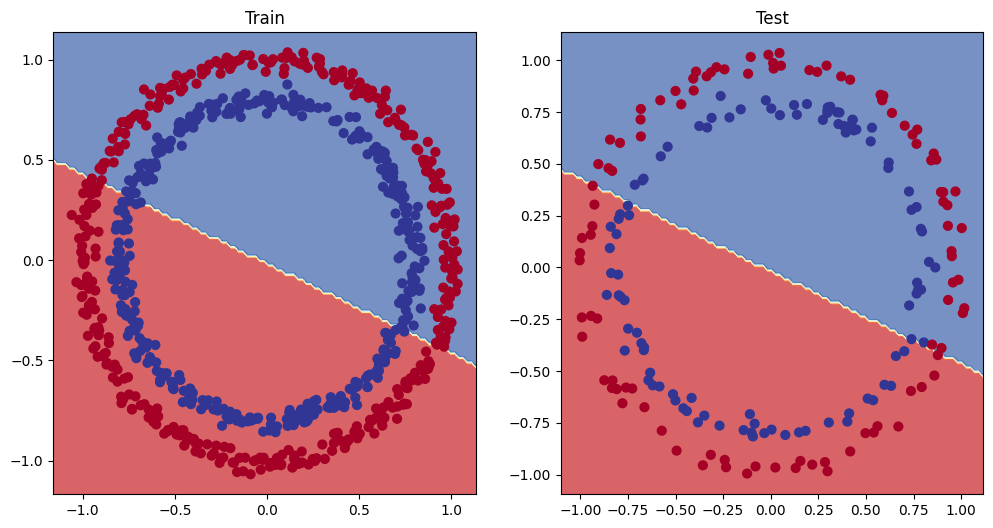

In [283]:
# plotting the predictions
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_V1_0,X_train,Y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_V1_0,X_test,Y_test)

### 5.5 Ppreparing data to see if our model can fit in straight line

In [284]:
weight=0.7
bias=0.3
start=0
end=1
step=0.01
#create a range of values from start to end with step size
X_regression=torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=X_regression*weight+bias
print(f"X_regression shape: {X_regression.shape}, y_regression shape: {y_regression.shape}")


X_regression shape: torch.Size([100, 1]), y_regression shape: torch.Size([100, 1])


In [285]:
train_split=int(len(X_regression)*0.8)
X_train_regression, y_train_regression=X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression=X_regression[train_split:], y_regression[train_split:]
#checking lengths
print(f"X_train_regression shape: {X_train_regression.shape}, y_train_regression shape: {y_train_regression.shape}")
print(f"X_test_regression shape: {X_test_regression.shape}, y_test_regression shape: {y_test_regression.shape}")

X_train_regression shape: torch.Size([80, 1]), y_train_regression shape: torch.Size([80, 1])
X_test_regression shape: torch.Size([20, 1]), y_test_regression shape: torch.Size([20, 1])


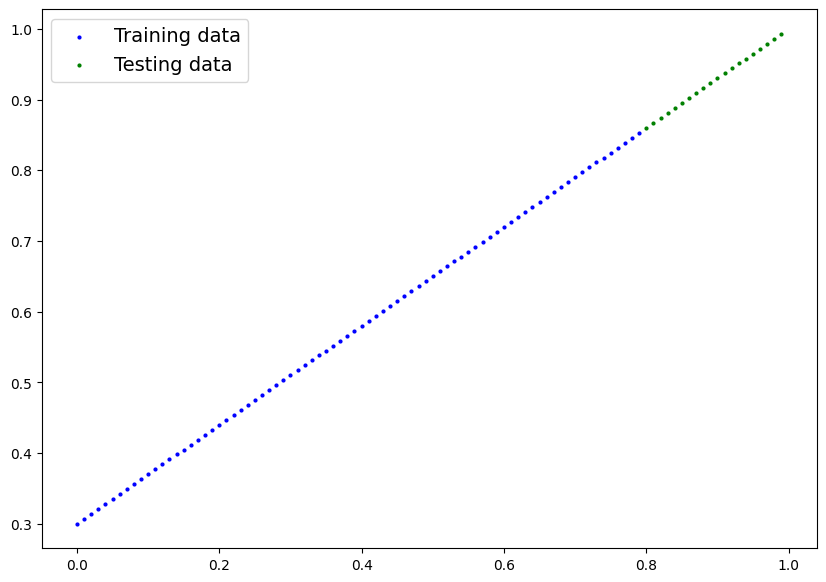

In [286]:
plot_predictions(train_data=X_train_regression,train_labels=y_train_regression,test_data=X_test_regression,test_labels=y_test_regression)

### 5.6 Adjusting model_V1_0 this data

In [287]:
model_V1_0

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=25, bias=True)
  (layer_3): Linear(in_features=25, out_features=1, bias=True)
)

In [288]:
model_V1_1=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=25),
    nn.Linear(in_features=25,out_features=50), 
    nn.Linear(in_features=50,out_features=1)  # output layer
).to(device=device)
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_V1_1.parameters(),lr=0.1)


In [289]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000
X_train_regression,y_train_regression=X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression=X_test_regression.to(device),y_test_regression.to(device)

for epoch in range(epochs):
    model_V1_1.train()  # set the model to training mode
    Y_preds=model_V1_1(X_train_regression)  # make predictions
    loss=loss_fn(Y_preds,y_train_regression)  # calculate the loss
    optimizer.zero_grad()  # zero the gradients
    loss.backward()  # backward pass
    optimizer.step()  # update the weights
    model_V1_1.eval()  # set the model to evaluation mode
    with torch.inference_mode():
        test_preds=model_V1_1(X_test_regression)# make predictions
        test_loss=loss_fn(test_preds,y_test_regression)
        if epoch % 100 == 99 or epoch == 0:
            print(f"Epoch: {epoch+1} | Train Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 1 | Train Loss: 0.49129 | Test Loss: 0.17444
Epoch: 100 | Train Loss: 0.10244 | Test Loss: 0.01745
Epoch: 200 | Train Loss: 0.08776 | Test Loss: 0.00881
Epoch: 300 | Train Loss: 0.06948 | Test Loss: 0.03528
Epoch: 400 | Train Loss: 0.04519 | Test Loss: 0.02619
Epoch: 500 | Train Loss: 0.04082 | Test Loss: 0.05102
Epoch: 600 | Train Loss: 0.05461 | Test Loss: 0.01530
Epoch: 700 | Train Loss: 0.06670 | Test Loss: 0.00635
Epoch: 800 | Train Loss: 0.07938 | Test Loss: 0.02875
Epoch: 900 | Train Loss: 0.06149 | Test Loss: 0.03134
Epoch: 1000 | Train Loss: 0.04729 | Test Loss: 0.03293


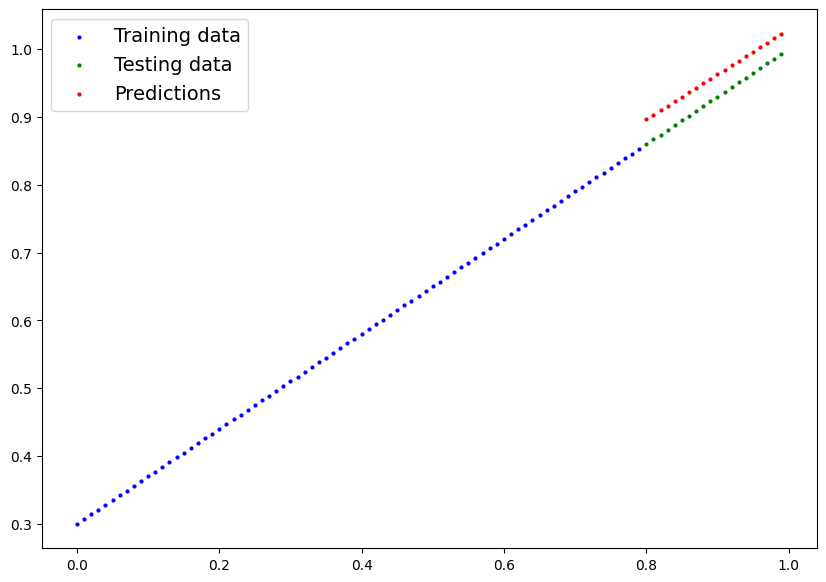

In [290]:
model_V1_1.eval()
with torch.inference_mode():
    plot_predictions(train_data=X_train_regression.cpu(), train_labels=y_train_regression.cpu(),test_data=X_test_regression.cpu(),test_labels=y_test_regression.cpu(),predictions=test_preds.cpu())

## 6.Non-linearity

### 6.1 Recreating non_linear data

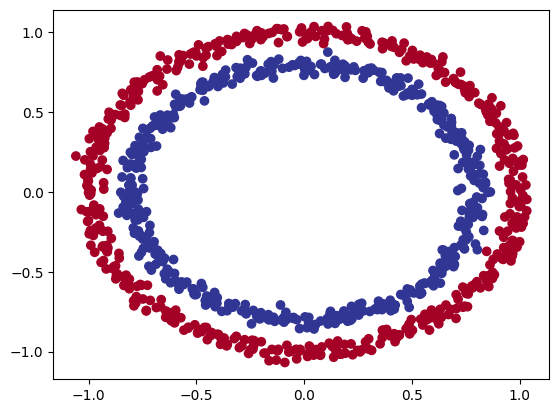

In [299]:
n_samples=1000
X_np,Y_np=make_circles(n_samples,noise=0.03,random_state=42)
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.RdYlBu)

### 6.1 Converting data to train and test then train and test the model

In [331]:
X=torch.from_numpy(X_np).type(torch.float)
Y=torch.from_numpy(Y_np).type(torch.float)
#split the data into train and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
#lengths of each set
print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}")

X_train shape: torch.Size([800, 2]), Y_train shape: torch.Size([800])
X_test shape: torch.Size([200, 2]), Y_test shape: torch.Size([200])


### 6.3 Building a Non-Linear model

In [332]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=10)  # takes 2 features and upscales to 10 features
        self.layer_2=nn.Linear(in_features=10,out_features=25)  # takes 10 features from previous layer and upscales to 25 features
        self.layer_3=nn.Linear(in_features=25,out_features=1)  # takes 25 features from previous layer and downscales to 1 feature (binary classification)
        self.relu=nn.ReLU()  # activation function
    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))  # this way we can use the model as a function

model_V2_0=CircleModelV2().to(device)

loss_fn=nn.BCEWithLogitsLoss()  # binary cross entropy with logits loss it has sigmoid activation function built in
optimizer=torch.optim.SGD(params=model_V2_0.parameters(),lr=0.18)  # stochastic gradient descent optimizer
# Calculate the Accuracy- out of 100 examples, how many are correct?
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc
model_V2_0

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=25, bias=True)
  (layer_3): Linear(in_features=25, out_features=1, bias=True)
  (relu): ReLU()
)

### 6.4 Training and testing Loops

In [333]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=2000 
X_train,Y_train=X_train.to(device),Y_train.to(device)
X_test,Y_test=X_test.to(device),Y_test.to(device)

for epoch in range(epochs):
    model_V2_0.train()  # set the model to training mode
    Y_logits=model_V2_0(X_train).squeeze()  # forward pass
    Y_preds=torch.round(torch.sigmoid(Y_logits))  # make predictions
    loss=loss_fn(Y_logits,Y_train)  # calculate the loss
    acc=accuracy_fn(y_true=Y_train,y_pred=Y_preds)  # calculate the accuracy
    optimizer.zero_grad()  # zero the gradients
    loss.backward()  # backward pass
    optimizer.step()  # update the weights
    model_V2_0.eval()  # set the model to evaluation mode
    with torch.inference_mode():
        test_logits=model_V2_0(X_test.to(device)).squeeze()
        test_preds=torch.round(torch.sigmoid(test_logits))  # make predictions
        test_loss=loss_fn(test_logits,Y_test)
        test_acc=accuracy_fn(y_true=Y_test,y_pred=test_preds)
        if epoch % 100 == 99 or epoch == 0:
            print(f"Epoch: {epoch+1} | Train Loss: {loss:.5f} | Train Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 1 | Train Loss: 0.69649 | Train Acc: 50.00% | Test Loss: 0.69640 | Test Acc: 50.00%
Epoch: 100 | Train Loss: 0.69128 | Train Acc: 51.62% | Test Loss: 0.69088 | Test Acc: 50.00%
Epoch: 200 | Train Loss: 0.68809 | Train Acc: 52.75% | Test Loss: 0.68745 | Test Acc: 55.50%
Epoch: 300 | Train Loss: 0.68152 | Train Acc: 63.25% | Test Loss: 0.68054 | Test Acc: 64.50%
Epoch: 400 | Train Loss: 0.66888 | Train Acc: 67.50% | Test Loss: 0.66699 | Test Acc: 67.50%
Epoch: 500 | Train Loss: 0.64197 | Train Acc: 75.62% | Test Loss: 0.64099 | Test Acc: 74.50%
Epoch: 600 | Train Loss: 0.55833 | Train Acc: 86.62% | Test Loss: 0.56621 | Test Acc: 90.00%
Epoch: 700 | Train Loss: 0.40488 | Train Acc: 89.38% | Test Loss: 0.49302 | Test Acc: 68.50%
Epoch: 800 | Train Loss: 0.45026 | Train Acc: 70.38% | Test Loss: 0.46722 | Test Acc: 69.00%
Epoch: 900 | Train Loss: 0.34775 | Train Acc: 81.12% | Test Loss: 0.38185 | Test Acc: 80.00%
Epoch: 1000 | Train Loss: 0.08396 | Train Acc: 99.75% | Test Loss: 0.104

### 6.4 Evaluating a model trained with non-linear activation function

In [334]:
model_V2_0.eval()
X_test=X_test.to(device)
with torch.inference_mode():
    Y_preds=torch.round(torch.sigmoid(model_V2_0(X_test))).squeeze()
Y_preds[:10],Y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

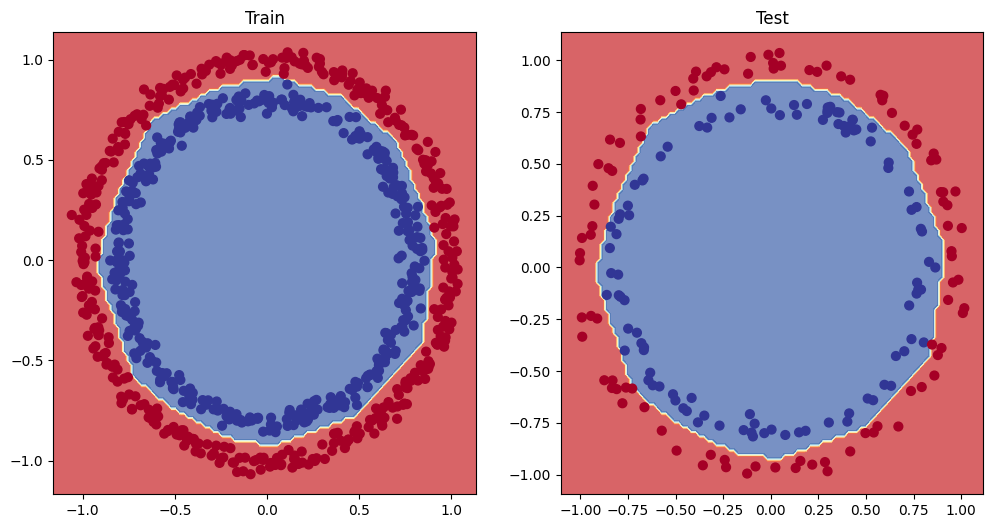

In [335]:
# plotting the predictions
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_V2_0,X_train,Y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_V2_0,X_test,Y_test)

## 7. Replicating non_linear activation functions

In [338]:
#Creating a tensor
A=torch.arange(-10.0,10.0,1.0)
A.dtype,A

(torch.float32,
 tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]))

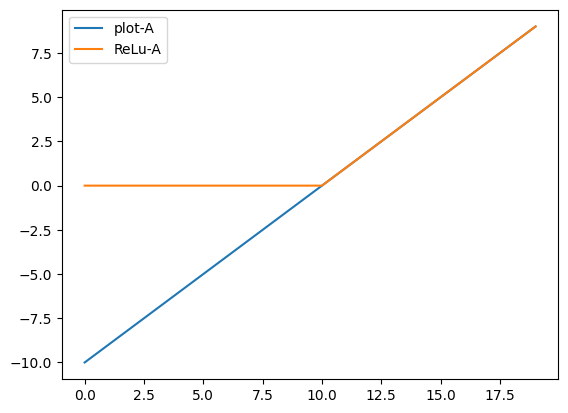

In [345]:
plt.plot(A)
plt.plot(torch.relu(A))
plt.legend(['plot-A','ReLu-A'])